<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/2_%EC%B6%9C%EC%83%9D%EC%95%84_%EC%88%98_%EB%B0%8F_%ED%95%A9%EA%B3%84_%EC%B6%9C%EC%82%B0%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 출생아 수 및 합계 출산율

#### 합계 출산율 : 한 여자가 가임기간 (15~49세)에 낳을 것으로 기대되는 평균 출생아 수

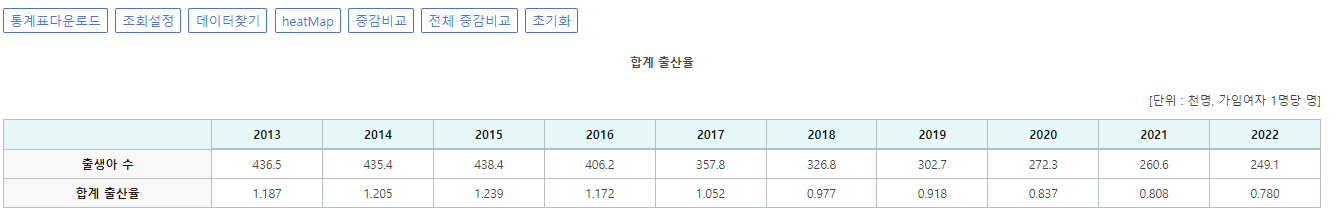

In [ ]:
!pip install koreanize_matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1. 데이터 로드
- stat.xlsx

In [ ]:
# skiprows=건너뛸 줄 수, nrows=데이터 불려올 줄 수, index_col=인덱스로 지정할 열 수

df = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/stat.xlsx", skiprows=2, nrows=2, index_col=0)
df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
출생아 수,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78


In [ ]:
# 인덱스

df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [ ]:
df.index.values
# array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [ ]:
# 인덱스명 수정 (출생아\xa0수 => 출생아 수)

# 컬럼명 수정
# df.columns = [수정할 컬럼명 포함해서 전체 컬럼명]
# df.rename(columns={"수정전컬럼명":"수정후컬럼명"})

df.rename(index={"출생아\xa0수":"출생아 수", "합계\xa0출산율":"합계 출산율"}, inplace=True)
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [ ]:
# 출생아 수

df.loc["출생아 수"]

2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
2022    249.1
Name: 출생아 수, dtype: float64

In [ ]:
# 행렬바꿈 : transpose() or T

# df.transpose()
df = df.T
df

,출생아 수,합계 출산율
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837
2021,260.6,0.808
2022,249.1,0.780


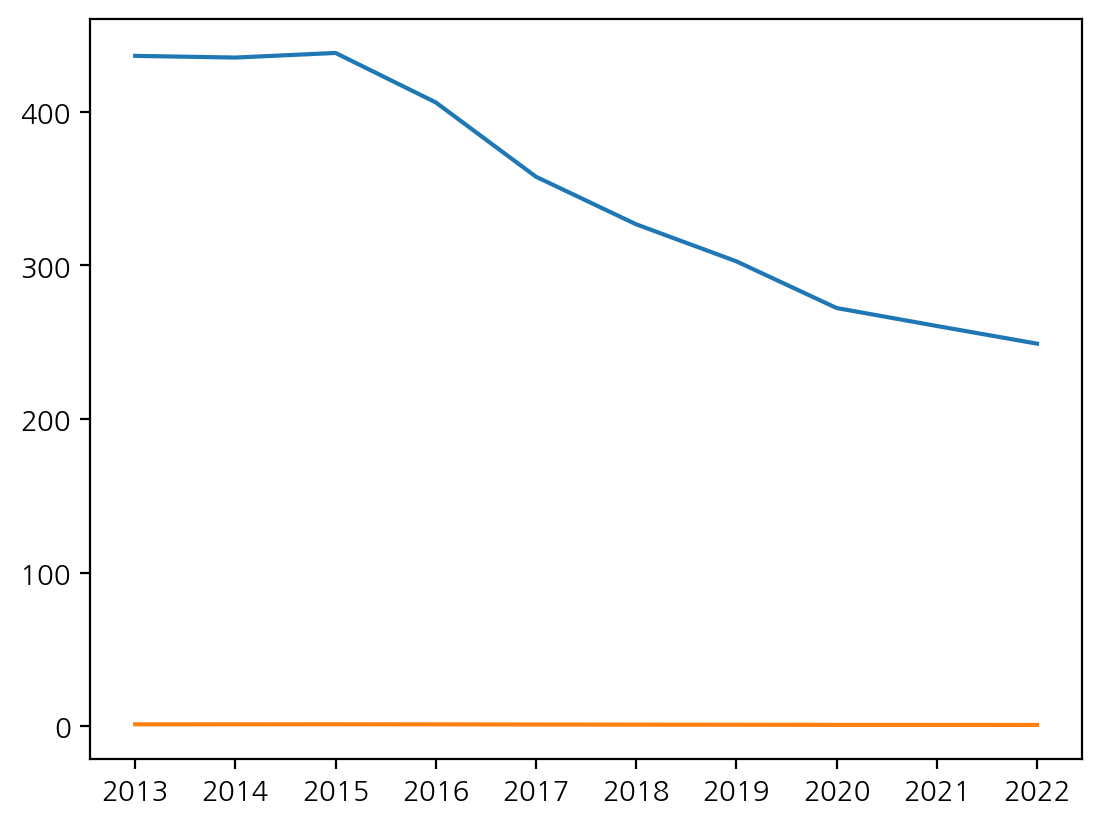

In [ ]:
# 선 차트 작성 : matplotlib
x = df.index

plt.plot(x,df["출생아 수"])
plt.plot(x,df["합계 출산율"]);

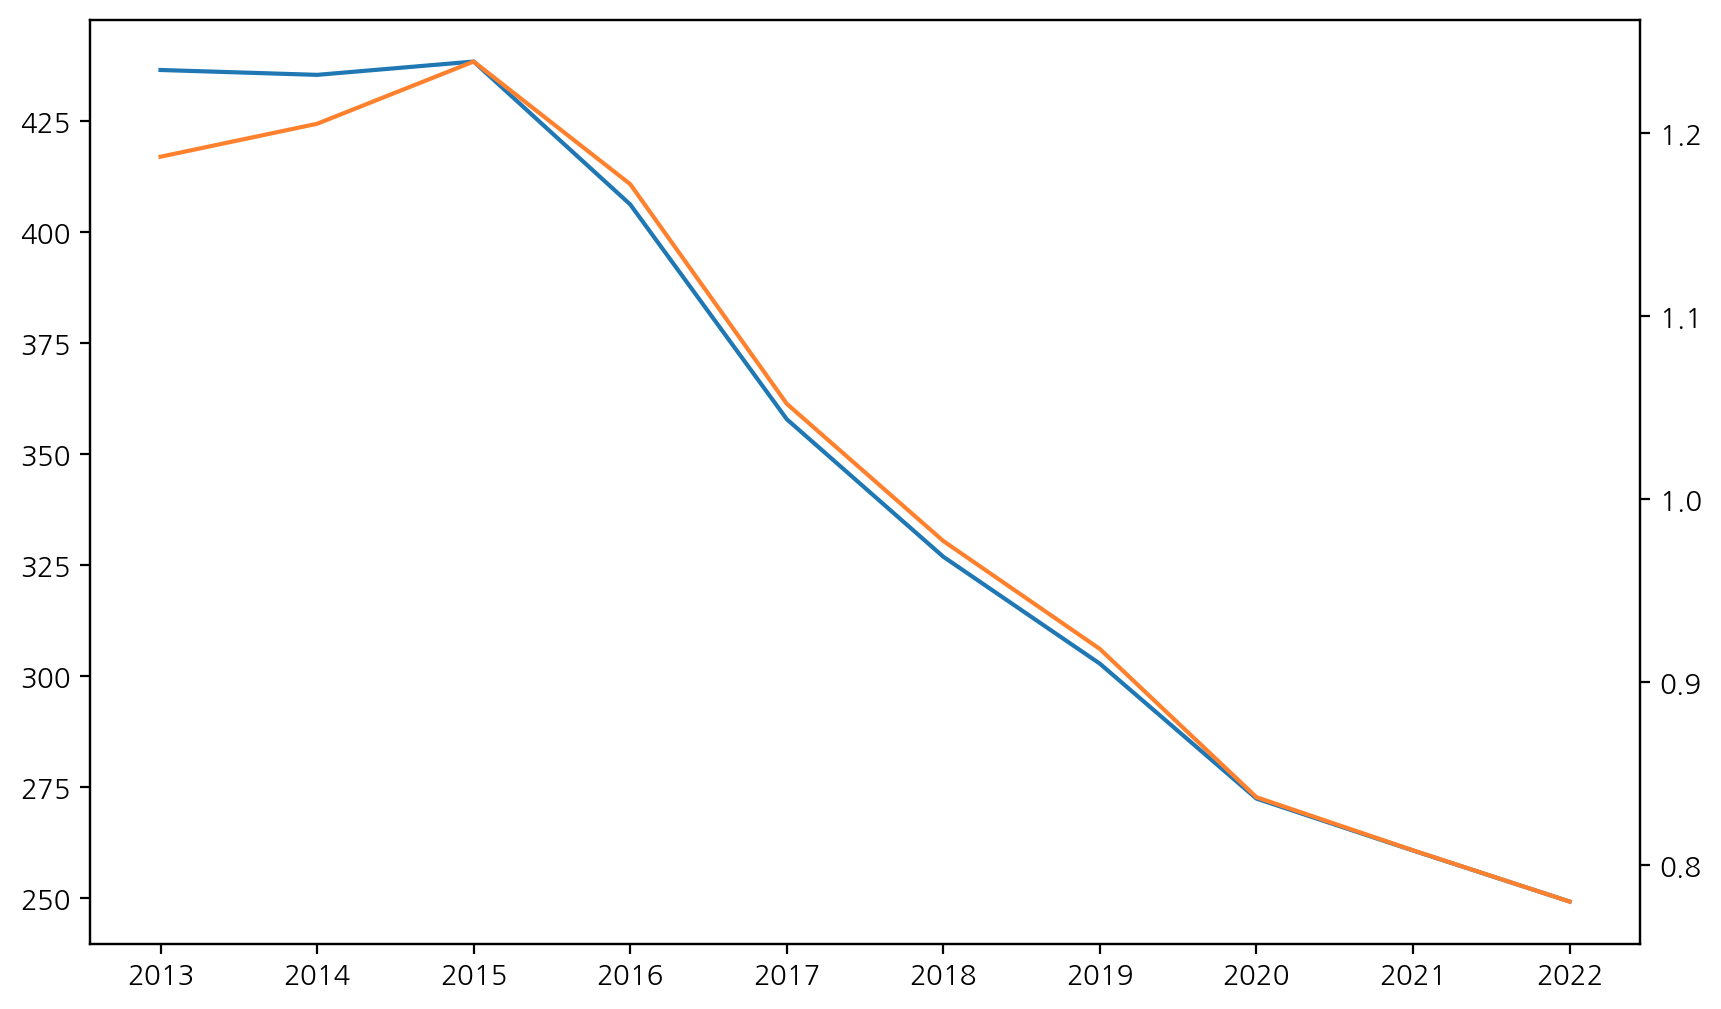

In [ ]:
# z축 설정

fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x,df["출생아 수"])

# z축
ax2 = ax.twinx()
ax2.plot(x,df["합계 출산율"], color="#ff812d");

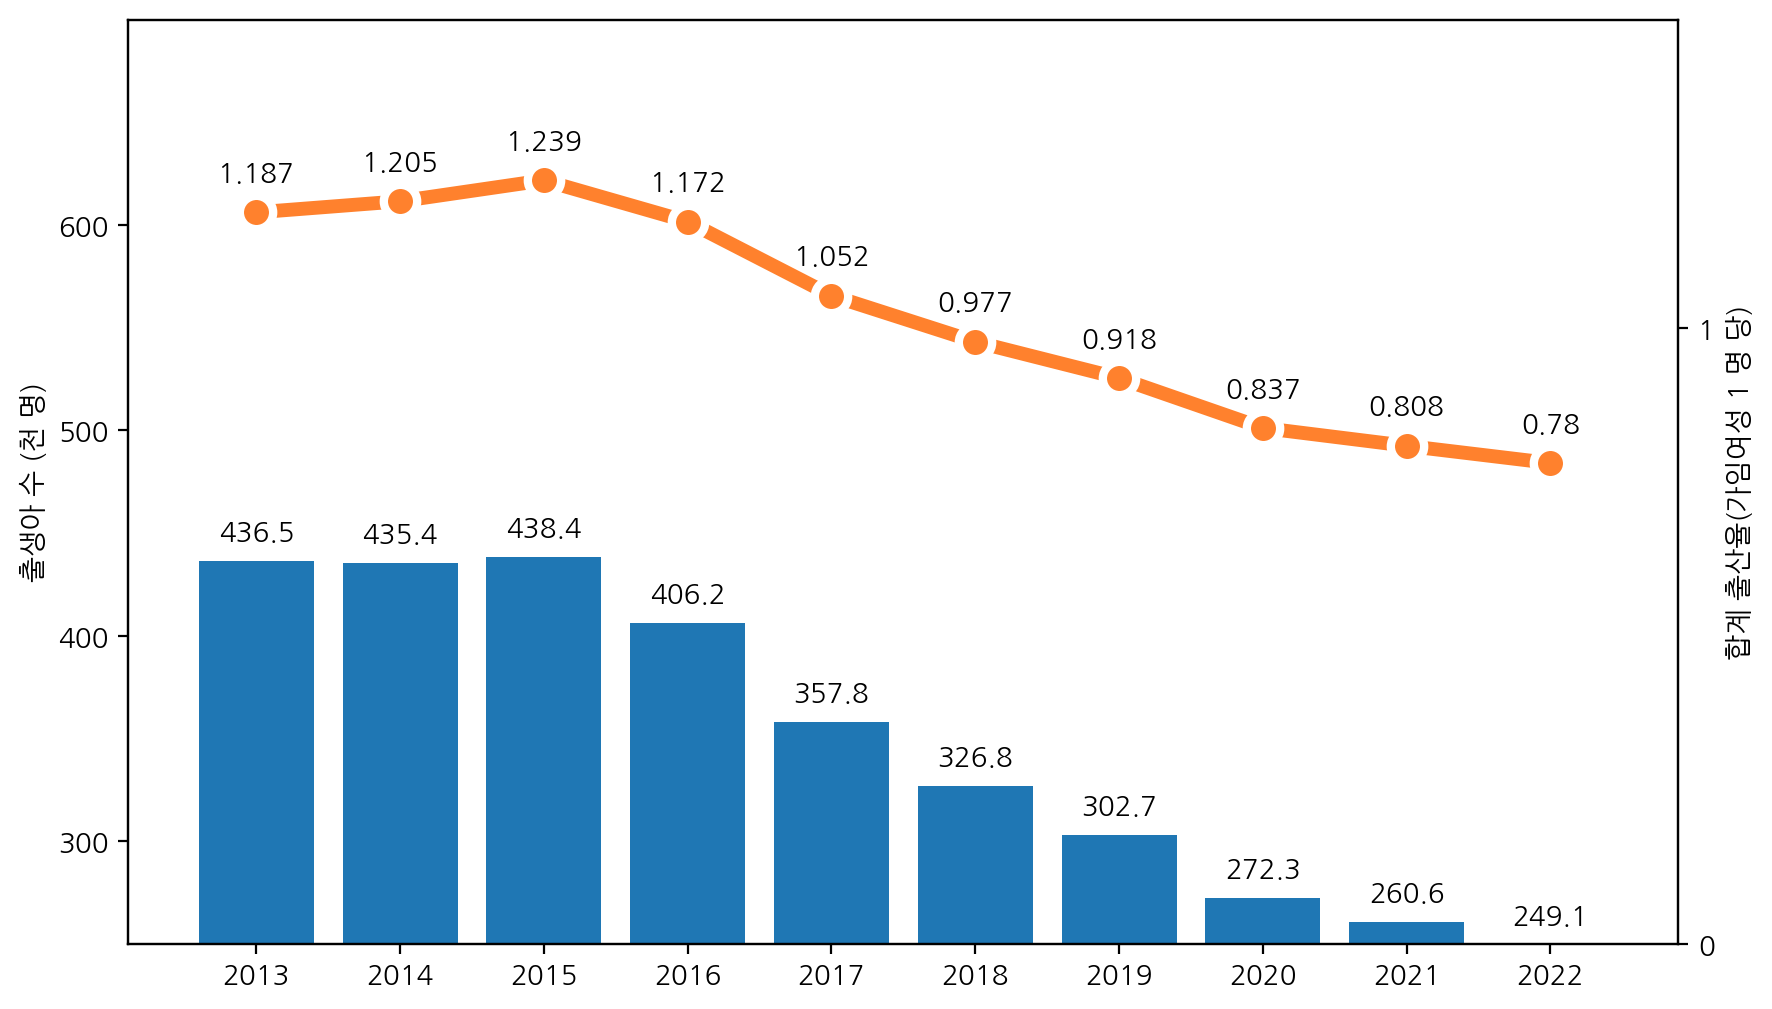

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_ylabel("출생아 수 (천 명)")
ax.set_ylim(250,700)
ax.set_yticks([300,400,500,600])
ax.bar(x,df["출생아 수"])

for idx,text in enumerate(df["출생아 수"]):
  ax.text(x[idx], text+10, text, ha="center")


# z축
ax2 = ax.twinx()
ax2.set_ylabel("합계 출산율(가임여성 1 명 당)")
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0,1])
ax2.plot(x,df["합계 출산율"], color="#ff812d", marker="o", ms=12, lw=5, mec="w", mew=3);

for idx,text in enumerate(df["합계 출산율"]):
  ax2.text(x[idx], text+0.05, text, ha="center")

<Axes: xlabel='None', ylabel='출생아 수'>

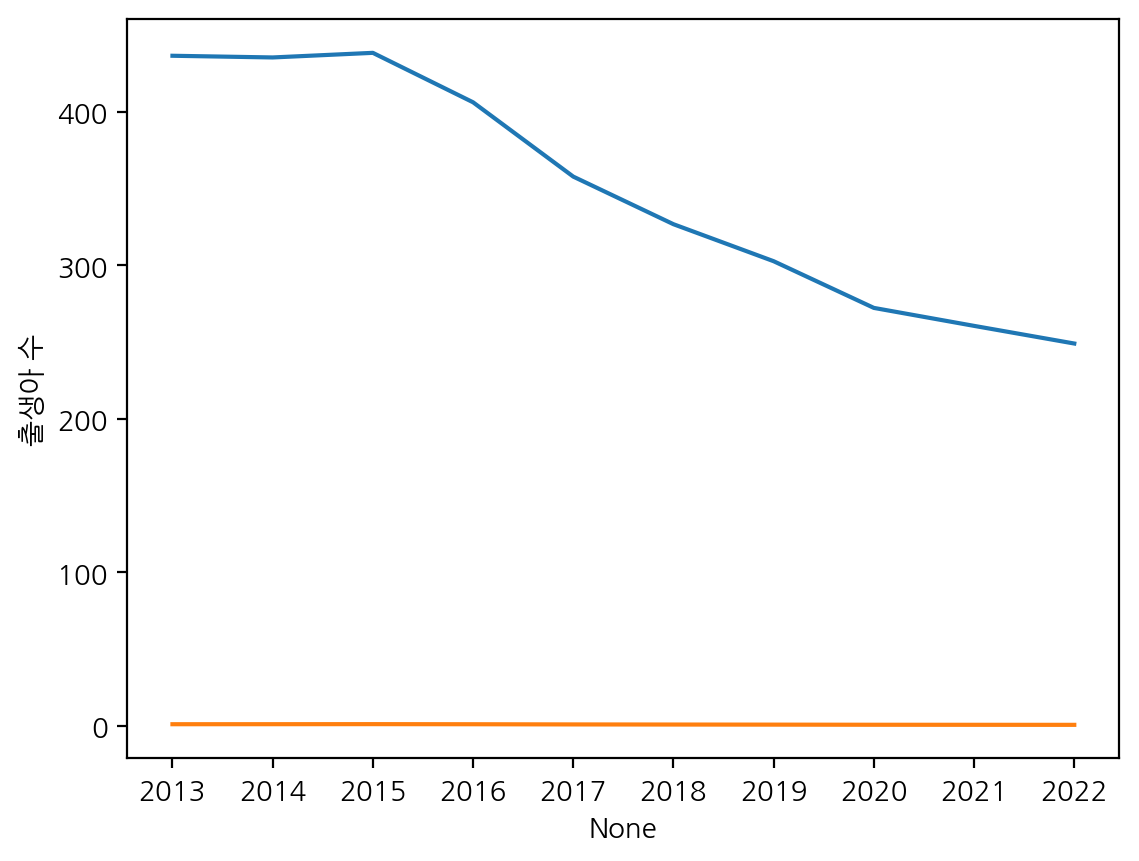

In [ ]:
sns.lineplot(data=df, x=df.index, y="출생아 수")
sns.lineplot(data=df, x=df.index, y="합계 출산율")